In [1]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.animation as anm
import matplotlib.pyplot as plt
import math
import matplotlib.patches as patches
import numpy as np
import csv

In [2]:
class GridMapWorld():
    def __init__(
        self,
        grid_step=np.array([0.1, 0.1]),
        grid_num=np.array([100, 100]),
        time_span=10,
        time_interval=0.1,
        map_data="map1.csv",
        debug=False,
        isDynamic=False,
        timeShow="step"
    ):
        self.objects = []  
        self.grid_step = grid_step
        self.grid_num = grid_num
        self.time_span = time_span
        self.time_interval = time_interval
        self.map_data = map_data
        self.debug = debug
        self.isDynamic = isDynamic
        self.timeShow = timeShow
        self.step = 0
        
        with open(self.map_data) as f:
            reader = csv.reader(f)
            self.grid_map = np.array([row for row in reader]).T
        self.start_index = [-1, -1]
        self.goal_index = [-1, -1]
        for index_x, grids in enumerate(self.grid_map):
            for index_y, grid in enumerate(grids):
                if grid == '2':
                    #Start
                    self.start_index = [index_x, index_y]
                elif grid == '3':
                    #Goal 
                    self.goal_index = [index_x, index_y]
        
    def append(self,obj):
        self.objects.append(obj)
    
    def draw(self):
        fig = plt.figure(figsize=(4,4))
        ax = fig.add_subplot(111)
        ax.set_aspect('equal')
        ax.set_xlim(0, self.grid_step[0]*self.grid_num[0])
        ax.set_ylim(0, self.grid_step[1]*self.grid_num[1])
        ax.set_xlabel("X",fontsize=10)
        ax.set_ylabel("Y",fontsize=10)  
        
        for index_x, grids in enumerate(self.grid_map):
            for index_y, grid in enumerate(grids):
                if grid == '0':
                    #Obstacle
                    if(self.isDynamic):
                        clr = "lightgray"
                    else:
                        clr = "black"
                    r = patches.Rectangle(
                        xy=(index_x*self.grid_step[0], index_y*self.grid_step[1]),
                        height=self.grid_step[0],
                        width=self.grid_step[1],
                        color=clr
                    )
                    ax.add_patch(r)
                elif grid == '2':
                    #Start
                    r = patches.Rectangle(
                        xy=(index_x*self.grid_step[0], index_y*self.grid_step[1]),
                        height=self.grid_step[0],
                        width=self.grid_step[1],
                        color="orange"
                    )
                    ax.add_patch(r)
                    self.start_index = [index_x, index_y]
                elif grid == '3':
                    #Goal
                    r = patches.Rectangle(
                        xy=(index_x*self.grid_step[0], index_y*self.grid_step[1]),
                        height=self.grid_step[0],
                        width=self.grid_step[1],
                        color="green"
                    )
                    ax.add_patch(r) 
                    self.goal_index = [index_x, index_y]
                    
        elems = []  
        
        if self.debug:        
            for i in range(int(self.time_span/self.time_interval)): self.one_step(i, elems, ax)
        else:
            self.ani = anm.FuncAnimation(
                fig, self.one_step, fargs=(elems, ax),
                frames=int(self.time_span/self.time_interval)+1,
                interval=int(self.time_interval*1000), 
                repeat=False
            )
            plt.show()
        
    def one_step(self, i, elems, ax):
        while elems: elems.pop().remove()
        
        if(self.timeShow == "time"):
            time_str = "t = %.2f[s]" % (self.time_interval*i)
        elif(self.timeShow == "step"):
            time_str = "step = " + str(i)
        else:
            time_str = ""
            
        elems.append(
            ax.text(
                self.grid_step[0]*self.grid_num[0]*0.01,
                self.grid_step[1]*self.grid_num[1]*1.02,
                time_str,
                fontsize=10
            )
        )
        
        for obj in self.objects:
            obj.draw(ax, elems)
            if hasattr(obj, "one_step"): obj.one_step(self.time_interval)
                
        #アニメーション保存時にステップ数を表示したい
        if(not(self.debug)):  #デバッグ時は表示しないようにする
            self.step += 1
            print(self.step)

<IPython.core.display.Javascript object>


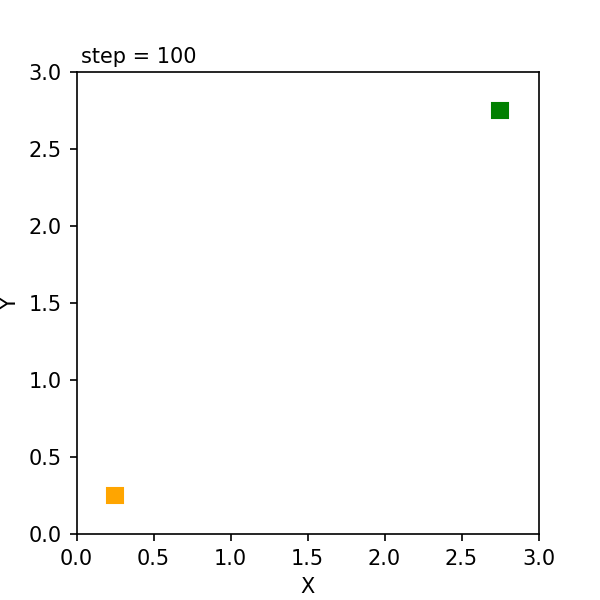

In [3]:
if __name__ == "__main__":
    time_span = 10
    time_interval = 0.1
    
    grid_step = [0.1, 0.1]
    grid_num = [30, 30]
    
    map_data = "csvmap/map1.csv"
    
    world = GridMapWorld(grid_step, grid_num, time_span, time_interval, map_data, debug=False, isDynamic=False)
    
    world.draw()
    #world.ani.save('input.gif', writer='pillow', fps=60)    #アニメーション保存